In [1]:
from pathlib import Path
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import colorcet as cc
biopubs_style = Path(os.getenv("SPIKECOUNTER_PATH"), "config", "bio_publications.mplstyle")
plt.style.use(
    biopubs_style
)

In [5]:
expt_name = "20221011_cell_areas"
rootdir = Path(os.getenv("DATA_ROOTDIR"), expt_name)
output_datadir = Path(os.getenv("ANALYSIS_OUTPUT_ROOTDIR"), "2022 First Heartbeat_Submitted", 
                       "Figures/Data/Figure2/")
os.makedirs(output_datadir/expt_name, exist_ok=True)

In [3]:
dfs = []
for f in os.listdir(rootdir):
    df = pd.read_csv(os.path.join(rootdir, f))
    df["file"] = f
    dfs.append(df)

In [4]:
all_cell_areas = pd.concat(dfs, axis=0)

In [6]:
all_cell_areas.to_csv(output_datadir/"confocal_cell_areas.csv")

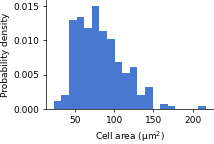

In [16]:
fig1, ax1 = plt.subplots(figsize=(3,2))
ax1.hist(all_cell_areas["Area"], density=True, bins=20)
ax1.set_xlabel(r"Cell area ($\mathrm{\mu m^2}$)")
ax1.set_ylabel(r"Probability density")
plt.savefig(os.path.join(figdir, "Supplementary Figures/cone_geometry/cell_areas.svg"))

In [13]:
np.mean(all_cell_areas["Area"])

82.2391377952757

In [14]:
np.std(all_cell_areas["Area"])

29.871583417601304